# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [339]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [17]:
# Your code here! :)
# create dataframe from file
credit_data = pd.read_csv('GermanCredit.csv.zip')
credit_data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [11]:
#look at columns 
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

In [21]:
# create dataframe to store the features alone
X = credit_data.copy()
X.drop('Class',axis=1, inplace=True)
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [23]:
credit_data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [22]:
#store the target class
y = credit_data['Class']
y.head()

0    Good
1     Bad
2    Good
3    Good
4     Bad
Name: Class, dtype: object

In [29]:
#split in to train test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print ('X',X.shape)
print ('X_train shape',X_train.shape)
print ('X_test shape',X_test.shape)
print ('y',y.shape)
print ('y_train shape',y_train.shape)
print ('y_test shape',y_test.shape)

X (1000, 61)
X_train shape (700, 61)
X_test shape (300, 61)
y (1000,)
y_train shape (700,)
y_test shape (300,)


In [340]:
#create a decisiontree classifier
dec_clf = DecisionTreeClassifier()
dec_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [341]:
#fit training data
dec_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
#look at sample predictions for test data 
# this prediction looks correct
x1 = X_train.iloc[1:2]
x1
print (dec_clf.predict(x1))
y1= y[1]
print (y1)

['Bad']
Bad


In [62]:
# this prediction does not look correct
x1_test = X_test.iloc[[3]]
x1_test
print (dec_clf.predict(x1_test))
y1_test = y_test.iloc[[3]]
print (y1_test)

['Good']
424    Bad
Name: Class, dtype: object


In [56]:
y_test.head()

900     Bad
237     Bad
940    Good
424     Bad
181     Bad
Name: Class, dtype: object

In [59]:
x1_test.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
237,21,2767,4,2,61,2,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0


In [342]:
# run prediction on test dataset 
#find classification report for the predictions 
y_predict = dec_clf.predict(X_test)
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         Bad       0.43      0.43      0.43        94
        Good       0.74      0.75      0.74       206

    accuracy                           0.65       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.64      0.65      0.65       300



In [486]:
from sklearn.metrics import accuracy_score
default_decision_tree_accuracy = accuracy_score(y_test,y_predict)
print ('default_decision_tree_accuracy',default_decision_tree_accuracy)

default_decision_tree_accuracy 0.6466666666666666


In [ ]:
Accuary is 0.65

In [344]:
#Perform hyperparameter tuning, through Grid Search and 5-fold Cross Validation
import time
start_time = time.time()

params = {'max_leaf_nodes': list(range(2, 20)),'max_depth': list(range(1, 20)), 'min_samples_split': [2, 3, 4]
          ,'criterion': ['entropy', 'gini'],'min_samples_leaf': [1, 2, 3, 4, 10,20] }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5,n_jobs=-1)
#n_jobs=-1 uses all cpu cores by running workers in parallel
# in mac, it uses all 4 cpu cores
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12312 candidates, totalling 61560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 6380 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 11980 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 19180 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 27980 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 38380 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 50380 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 61560 out of 61560 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [345]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [346]:
#find best params and score on training dataset
print("Best: %f using %s" % (grid_search_cv.best_score_, grid_search_cv.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.738571 using {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 17, 'min_samples_leaf': 2, 'min_samples_split': 2}
Execution time: 295.26948499679565 ms


In [347]:
# create a optimal classifier using the best parameters
optimal_dec_clf=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [348]:
#fit training data
optimal_dec_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [349]:
# run prediction on test dataset 
#find classification report for the predictions 
optimal_y_predict = optimal_dec_clf.predict(X_test)
print (classification_report(y_test,optimal_y_predict))

              precision    recall  f1-score   support

         Bad       0.47      0.37      0.42        94
        Good       0.74      0.81      0.77       206

    accuracy                           0.67       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.66      0.67      0.66       300



In [487]:
optimal_decision_tree_accuracy = accuracy_score(y_test,optimal_y_predict)
print ('optimal_decision_tree_accuracy',optimal_decision_tree_accuracy)

optimal_decision_tree_accuracy 0.6733333333333333


In [ ]:
Accuracy is 0.67, a littler better than 0.65 got using default params.

In [197]:
x1_optimal_test = X_test.iloc[[3]]
#x1_test
print (optimal_dec_clf.predict(x1_optimal_test))
y1_test = y_test.iloc[[3]]
print (y1_test)

['Good']
424    Bad
Name: Class, dtype: object


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
! pip install dtreeviz

/Users/Anusha/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


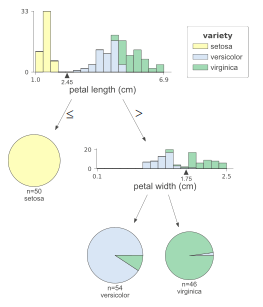

In [113]:
#below is sample for iris dataset
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
classifier = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
iris = load_iris()
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz

In [112]:
#below is sample for iris dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [120]:
#below is sample for iris dataset
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [350]:
#for the german data set,  the target lables are strings.
#but dtreeviz gives error 
#ValueError: y_data needs to consist only of numerical values. could not convert string to float: 'Good'
#so , convert lables to numeric using label encoding
from sklearn import preprocessing

y_hot = y_train.copy()
type(y_hot)
y_hot = y_train.to_frame(name='Class')
y_hot.head()
#y_hot.info
le = preprocessing.LabelEncoder()
le.fit(y_hot)
y_hot['categorical_label'] = le.transform(y_hot)
y_hot['categorical_label']
#type(y_hot)
y_t= y_hot['categorical_label']
type(y_t)

/Users/Anusha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Anusha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pandas.core.series.Series

In [157]:
y_hot.head()

,Class,categorical_label
12,Good,1
116,Bad,0
938,Bad,0
729,Good,1
344,Good,1


/Users/Anusha/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


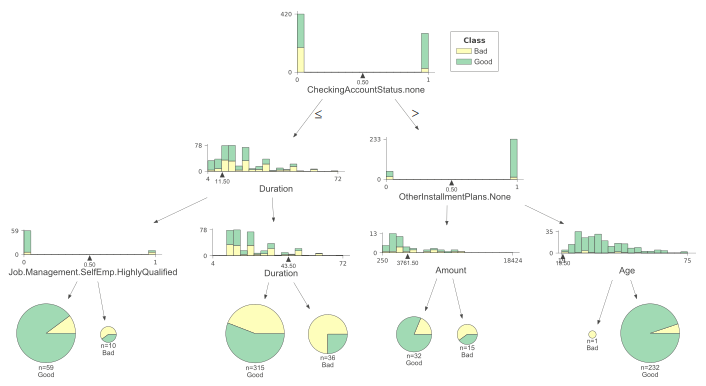

In [351]:
#build a classifier using the encoded dataset
classifier_1 = DecisionTreeClassifier(max_depth=3)  # limit depth of tree
classifier_1.fit(X_train, y_t)

viz = dtreeviz(classifier_1, 
               X_train, 
               y_t,
               target_name='Class',
               feature_names=feature_names, 
               #class_names=[0, 1]
               class_names={0:'Bad',1:'Good'}
              )  
              
viz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [352]:
from sklearn.ensemble import RandomForestClassifier

In [353]:
# Your code here! :)
#create a classifier
random_frst_clf = RandomForestClassifier()
random_frst_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [354]:
#fit training data
random_frst_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [355]:
# run prediction on test dataset 
#find classification report for the predictions 

y_frst_predict = random_frst_clf.predict(X_test)
print (classification_report(y_test,y_frst_predict))

              precision    recall  f1-score   support

         Bad       0.62      0.33      0.43        94
        Good       0.75      0.91      0.82       206

    accuracy                           0.73       300
   macro avg       0.68      0.62      0.63       300
weighted avg       0.71      0.73      0.70       300



In [356]:
x1_frst_test = X_test.iloc[[3]]
#x1_test
print (random_frst_clf.predict(x1_frst_test))
y1_test = y_test.iloc[[3]]
print (y1_test)

['Good']
424    Bad
Name: Class, dtype: object


In [488]:
default_random_forest_accuracy_score = accuracy_score(y_test,y_frst_predict)
print ('default_random_forest_accuracy_score',default_random_forest_accuracy_score)

default_random_forest_accuracy_score 0.7266666666666667


In [ ]:
default_random_forest_accuracy_score is 0.72

In [225]:
#Perform hyperparameter tuning, through Grid Search and 5-fold Cross Validation
import time
frst_start_time = time.time()

params = {'max_leaf_nodes': list(range(2, 20)),'max_depth': list(range(1, 10)), 'min_samples_split': [2, 3, 4]
        , 'max_features': ['auto', 'log2']
         ,'n_estimators': list(range(100,141,20))}

frst_grid_search_cv = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=5,n_jobs = -1)
# n_jobs = -1 uses all cpu cores and runs concurrent workers 
frst_grid_search_cv.fit(X_train, y_train)
print("Execution time: " + str((time.time() - frst_start_time)) + ' ms')

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

Execution time: 1485.9039659500122 ms


In [358]:
frst_grid_search_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=17, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [359]:
#find best params and score on training dataset
print("Best: %f using %s" % (frst_grid_search_cv.best_score_, frst_grid_search_cv.best_params_))


Best: 0.747143 using {'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 17, 'min_samples_split': 4, 'n_estimators': 100}


In [360]:
# create a optimal classifier using the best parameters

optimal_frst_clf =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=17, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [361]:
#fit training data
optimal_frst_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=17, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [362]:
optimal_y_frst =optimal_frst_clf.predict(X_test)
print (classification_report(y_test,optimal_y_frst))

              precision    recall  f1-score   support

         Bad       0.86      0.19      0.31        94
        Good       0.73      0.99      0.84       206

    accuracy                           0.74       300
   macro avg       0.79      0.59      0.58       300
weighted avg       0.77      0.74      0.67       300



In [489]:
optimal_random_forest_classifier_accuracy_score = accuracy_score(y_test,optimal_y_frst)
print ('optimal_random_forest_classifier_accuracy_score',optimal_random_forest_classifier_accuracy_score)

optimal_random_forest_classifier_accuracy_score 0.7366666666666667


In [ ]:
Accuracy is little better using the optimal parameters.
accuracy is 0.74 compared to 0.73 (default parameters)

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [302]:
# Your code here
import time
import numpy as np

start_time = time.time()
importances = optimal_frst_clf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in optimal_frst_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.018 seconds


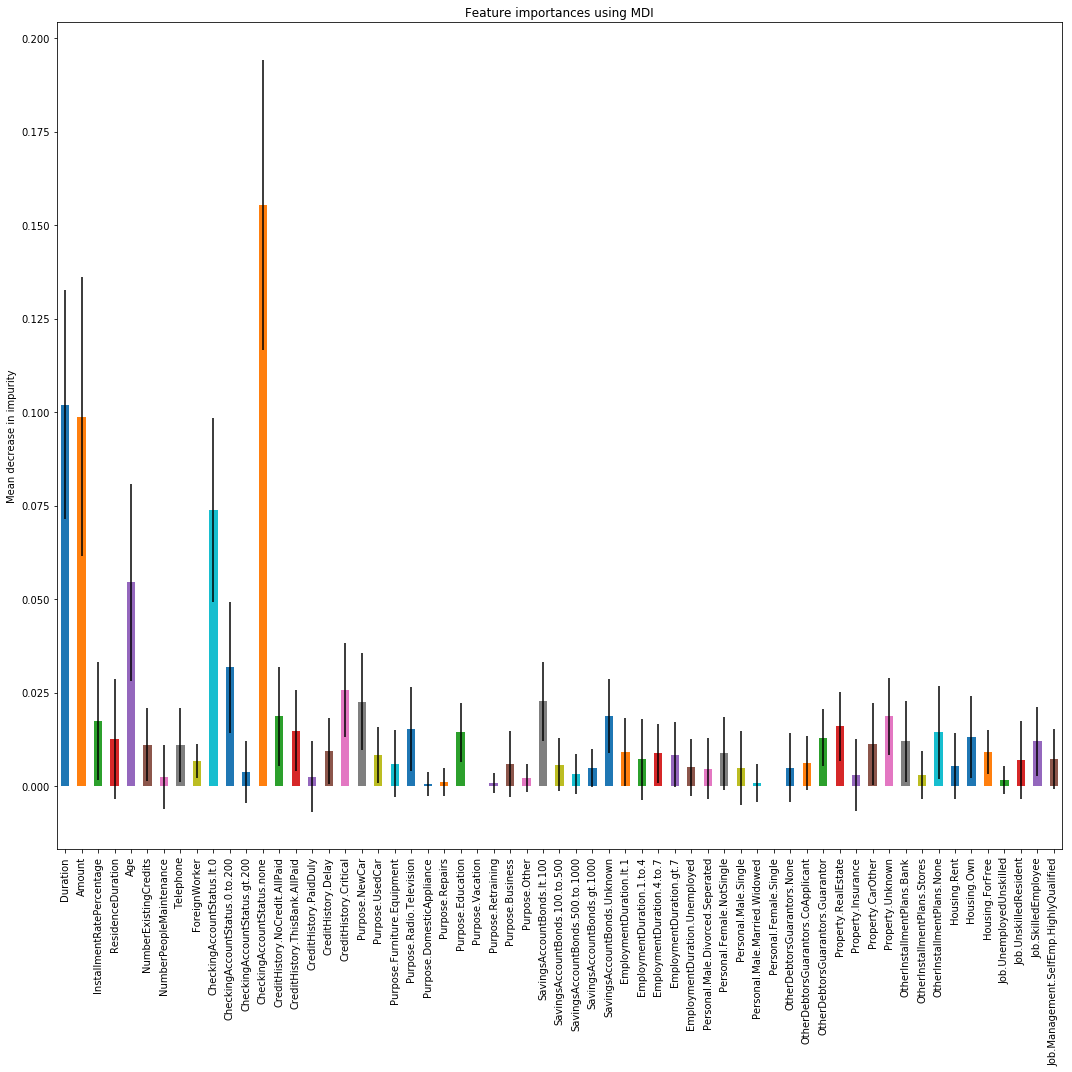

In [335]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(15,15))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

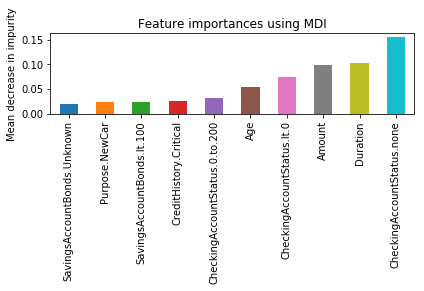

In [337]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)
top_forest_importances = forest_importances.sort_values()[-10:]
fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
top_forest_importances.plot.bar( ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [492]:
top_forest_importances

SavingsAccountBonds.Unknown       0.018757
Purpose.NewCar                    0.022590
SavingsAccountBonds.lt.100        0.022653
CreditHistory.Critical            0.025654
CheckingAccountStatus.0.to.200    0.031771
Age                               0.054450
CheckingAccountStatus.lt.0        0.073802
Amount                            0.098743
Duration                          0.102012
CheckingAccountStatus.none        0.155343
dtype: float64

In [333]:
#permutation_importance
from sklearn.inspection import permutation_importance

start_time = time.time()
perm_result = permutation_importance(
    optimal_frst_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

perm_forest_importances = pd.Series(perm_result.importances_mean, index=feature_names)


Elapsed time to compute the importances: 8.377 seconds


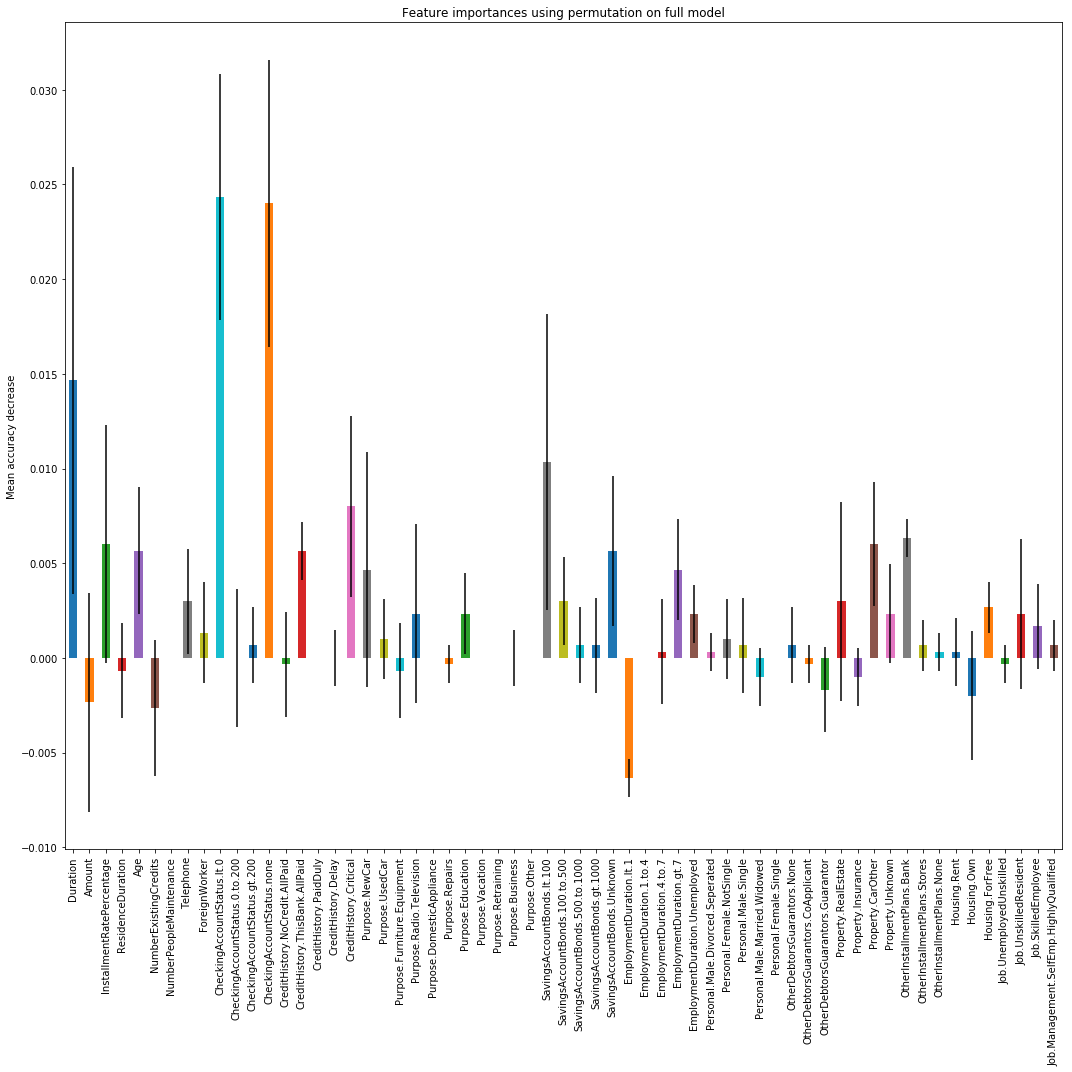

In [338]:
#permutation_importance
fig, ax = plt.subplots(figsize=(15,15))
perm_forest_importances.plot.bar(yerr=perm_result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

<Figure size 864x864 with 0 Axes>

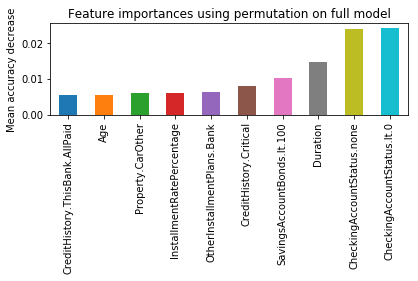

In [334]:
#permutation_importance
import pandas as pd
#perm_forest_importances = pd.Series(perm_forest_importances.importances_mean, index=feature_names)
perm_forest_importances = pd.Series(perm_result.importances_mean, index=feature_names)
top_perm_forest_importances = perm_forest_importances.sort_values()[-10:]
plt.figure(figsize=(12,12))
fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
top_perm_forest_importances.plot.bar( ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

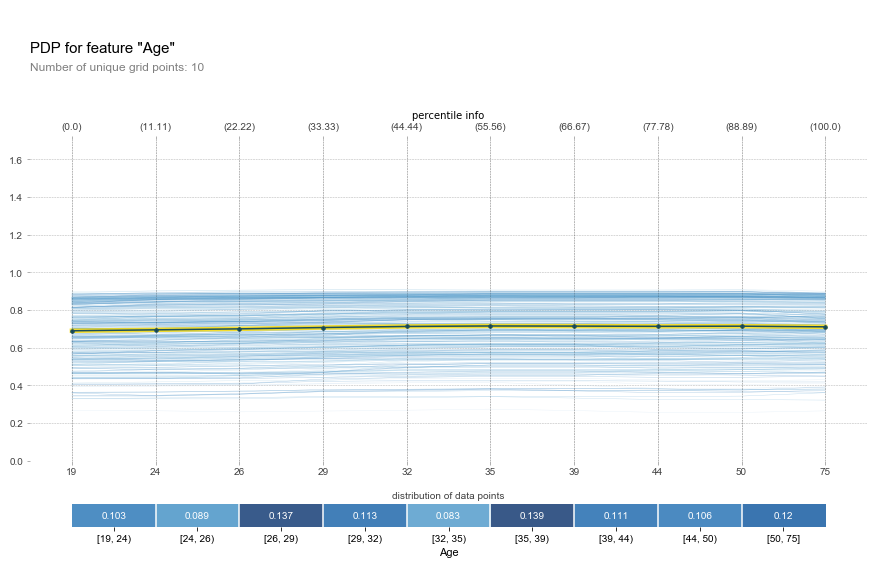

In [500]:
# Your code here!
from pdpbox import pdp, info_plots
pdp_age = pdp.pdp_isolate(
    model=optimal_frst_clf, dataset=X_train, model_features=X_train.columns, feature='Age')
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_age, 'Age', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)


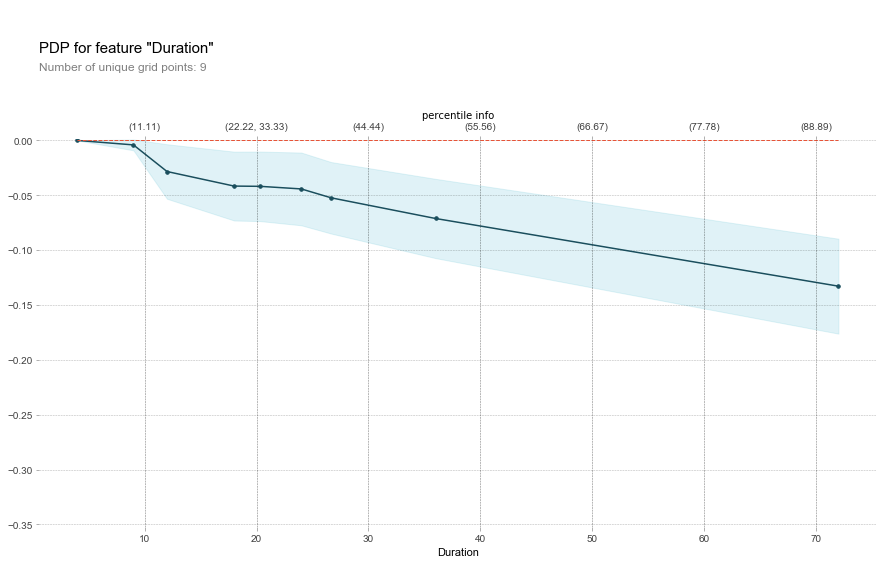

In [522]:
# Your code here!
from pdpbox import pdp, info_plots
pdp_duration = pdp.pdp_isolate(
    model=optimal_frst_clf, dataset=X_train, model_features=X_train.columns, feature='Duration')
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_duration, 'Duration', plot_lines=False,show_percentile=True)


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1297202e8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x132ce0d30>})

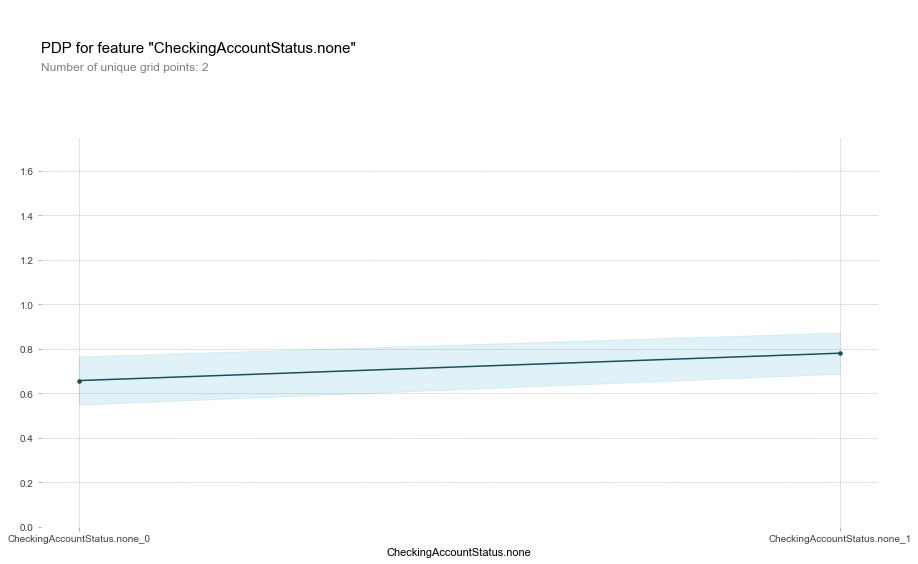

In [520]:
pdp_chk = pdp.pdp_isolate(
    model=optimal_frst_clf, dataset=X_train, model_features=X_train.columns, feature='CheckingAccountStatus.none'
)
pdp.pdp_plot(pdp_chk, 'CheckingAccountStatus.none',center=False)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x12f930390>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x131b00fd0>})

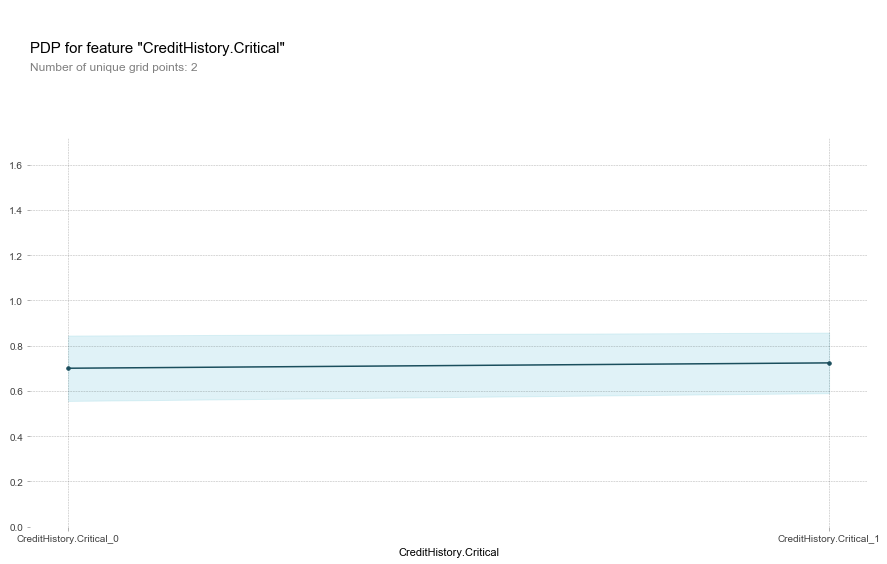

In [519]:
pdp_credit = pdp.pdp_isolate(
    model=optimal_frst_clf, dataset=X_train, model_features=X_train.columns, feature='CreditHistory.Critical'
)
pdp.pdp_plot(pdp_credit, 'CreditHistory.Critical',center=False)

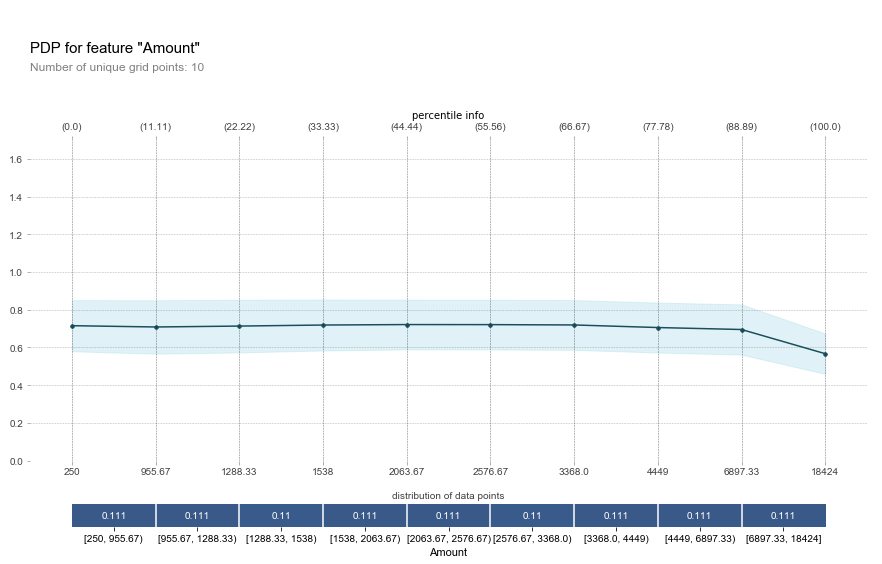

In [523]:
# Your code here!
from pdpbox import pdp, info_plots
pdp_amt = pdp.pdp_isolate(
    model=optimal_frst_clf, dataset=X_train, model_features=X_train.columns, feature='Amount')
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_amt, 'Amount', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)


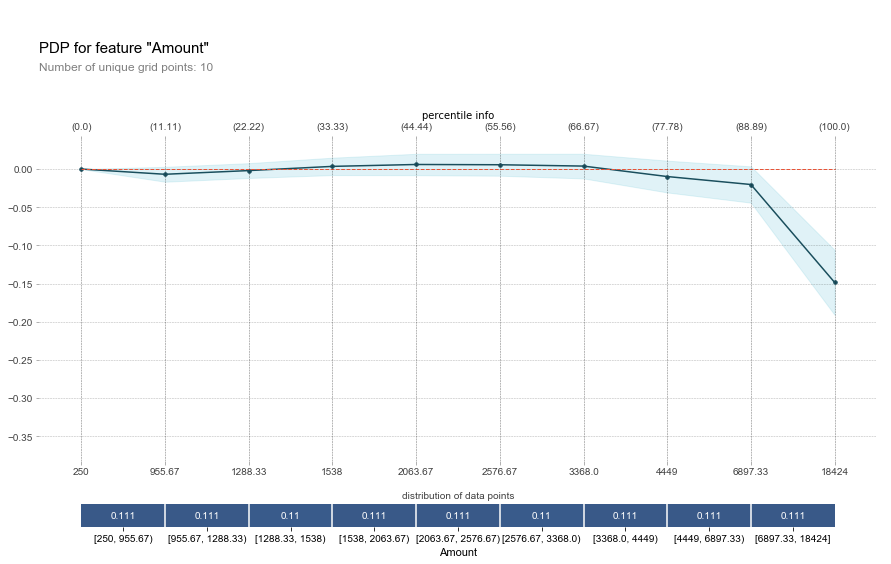

In [524]:
# Your code here!
from pdpbox import pdp, info_plots
pdp_amt = pdp.pdp_isolate(
    model=optimal_frst_clf, dataset=X_train, model_features=X_train.columns, feature='Amount')
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_amt, 'Amount', plot_lines=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)


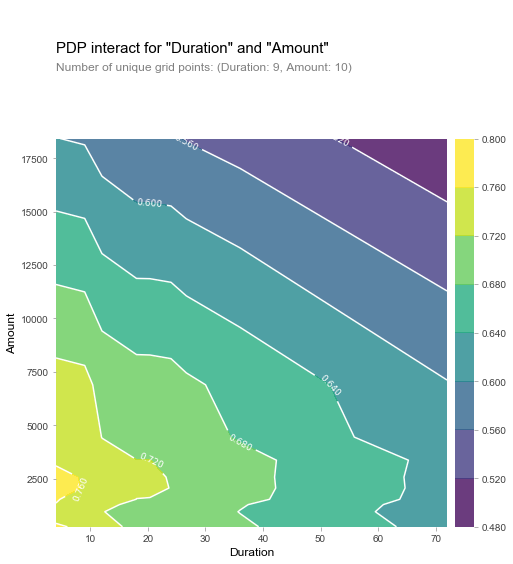

In [512]:
inter1 = pdp.pdp_interact(
    model=optimal_frst_clf, dataset=X_train, model_features=X_train.columns, features=['Duration', 'Amount']
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=['Duration', 'Amount'], plot_type='contour', plot_pdp=False
)


## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [474]:
# import xgboost as xgb
xgb_clf = xgb.XGBClassifier( 
    learning_rate =0.01,
 n_estimators=50,
 max_depth=4,
 min_child_weight=5,
 subsample=0.7,
 colsample_bytree=0.8,
seed=15
                           )
xgb_clf
xgb_clf.fit(X_train,y_train)
xgb_predicted = xgb_clf.predict(X_test)
print (classification_report(y_test,xgb_predicted))

[15:07:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         Bad       0.64      0.31      0.42        94
        Good       0.75      0.92      0.82       206

    accuracy                           0.73       300
   macro avg       0.69      0.62      0.62       300
weighted avg       0.71      0.73      0.70       300



/Users/Anusha/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [475]:
xgb_clf.fit(X_train,y_train)

[15:07:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/Anusha/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=15, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=15, subsample=0.7,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [476]:
xgb_predicted = xgb_clf.predict(X_test)
print (classification_report(y_test,xgb_predicted))

              precision    recall  f1-score   support

         Bad       0.64      0.31      0.42        94
        Good       0.75      0.92      0.82       206

    accuracy                           0.73       300
   macro avg       0.69      0.62      0.62       300
weighted avg       0.71      0.73      0.70       300



In [514]:
xgb_accuracy_score = accuracy_score(y_test,xgb_predicted)
print ('xgb_accuracy_score',xgb_accuracy_score)

xgb_accuracy_score 0.73


In [477]:
import time
frst_start_time = time.time()

xgb_params= { 'learning_rate': [0.001, 0.01, 0.1 ], 'n_estimators': [50,75,100],
            'subsample': [0.5,  0.7,  1.0], 'max_depth': [4,5,7],
            'min_child_weight': [3.0, 5.0, 10.0], 'colsample_bytree':  [0.6,0.8, 1.0],
            'reg_lambda': [0.3, 1.0, 5.0], 'gamma': [0, 0.25]} 
xgboost_grid_search_cv = GridSearchCV(xgb.XGBClassifier(), xgb_params, verbose=1, cv=5,n_jobs = -1)
# n_jobs = -1 uses all cpu cores and runs concurrent workers 
xgboost_grid_search_cv.fit(X_train, y_train)
print("Execution time: " + str((time.time() - frst_start_time)) + ' ms')

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

[15:47:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Execution time: 2199.515056848526 ms


In [478]:
print("Best: %f using %s" % (xgboost_grid_search_cv.best_score_, xgboost_grid_search_cv.best_params_))


Best: 0.767143 using {'colsample_bytree': 0.6, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3.0, 'n_estimators': 50, 'reg_lambda': 0.3, 'subsample': 0.5}


In [479]:
xgboost_grid_search_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [482]:
optimal_xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3.0, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.3, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
optimal_xgb_clf.fit(X_train,y_train)
optimal_xgb_predicted = optimal_xgb_clf.predict(X_test)
print (classification_report(y_test,optimal_xgb_predicted))

[15:56:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         Bad       0.62      0.41      0.50        94
        Good       0.77      0.88      0.82       206

    accuracy                           0.74       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300



/Users/Anusha/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [513]:
optimal_xgb_accuracy_score = accuracy_score(y_test,optimal_xgb_predicted)
print ('optimal_xgb_accuracy_score',optimal_xgb_accuracy_score)

optimal_xgb_accuracy_score 0.7366666666666667


In [483]:
import time
new_xgb_start_time = time.time()

new_xgb_params= { 'learning_rate': [0.001, 0.01, 0.1 ], 'n_estimators': [50,75,100],
            'subsample': [0.5,  0.7,  1.0], 'max_depth': [4,5,7],
            'min_child_weight': [3.0, 5.0, 10.0], 'colsample_bytree':  [0.6,0.8, 1.0],
            'reg_lambda': [0.1, 0.3, 1.0], 'gamma': [0, 0.25], 'seed': [8,15,30]} 
new_xgboost_grid_search_cv = GridSearchCV(xgb.XGBClassifier(), new_xgb_params, verbose=1, cv=5,n_jobs = -1)
# n_jobs = -1 uses all cpu cores and runs concurrent workers 
new_xgboost_grid_search_cv.fit(X_train, y_train)
print("Execution time: " + str((time.time() - new_xgb_start_time)) + ' ms')

Fitting 5 folds for each of 13122 candidates, totalling 65610 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

[17:49:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Execution time: 6696.78821015358 ms


/Users/Anusha/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [484]:
print("Best: %f using %s" % (new_xgboost_grid_search_cv.best_score_, new_xgboost_grid_search_cv.best_params_))
new_xgboost_grid_search_cv.best_estimator_

Best: 0.774286 using {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3.0, 'n_estimators': 75, 'reg_lambda': 0.1, 'seed': 8, 'subsample': 0.5}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=8, reg_alpha=0,
              reg_lambda=0.1, scale_pos_weight=1, seed=8, subsample=0.5,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [485]:
new_optimal_xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3.0, monotone_constraints='()',
              n_estimators=75, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=8, reg_alpha=0,
              reg_lambda=0.1, scale_pos_weight=1, seed=8, subsample=0.5,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
new_optimal_xgb_clf.fit(X_train,y_train)
new_optimal_xgb_predicted = new_optimal_xgb_clf.predict(X_test)
print (classification_report(y_test,new_optimal_xgb_predicted))

[17:57:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         Bad       0.62      0.41      0.50        94
        Good       0.77      0.88      0.82       206

    accuracy                           0.74       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.72      0.74      0.72       300



/Users/Anusha/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [515]:
new_optimal_xgb_accuracy_score = accuracy_score(y_test,new_optimal_xgb_predicted)
print ('new optimal_xgb_accuracy_score',new_optimal_xgb_accuracy_score)

new optimal_xgb_accuracy_score 0.7366666666666667


In [525]:
#print all accuracy
print ('default_decision_tree_accuracy',default_decision_tree_accuracy)
print ('optimal_decision_tree_accuracy',optimal_decision_tree_accuracy)

print ('default_random_forest_accuracy_score',default_random_forest_accuracy_score)

print ('optimal_random_forest_classifier_accuracy_score',optimal_random_forest_classifier_accuracy_score)

print ('optimal_xgb_accuracy_score',optimal_xgb_accuracy_score)



default_decision_tree_accuracy 0.6466666666666666
optimal_decision_tree_accuracy 0.6733333333333333
default_random_forest_accuracy_score 0.7266666666666667
optimal_random_forest_classifier_accuracy_score 0.7366666666666667
optimal_xgb_accuracy_score 0.7366666666666667
